# __**Bike Sharing Demand**__

>物理二 陳戎祿 110202531 

>[Bike Sharing Demand in kagggle](https://www.kaggle.com/c/bike-sharing-demand)

## Competition introduction


>&emsp; &ensp;Bike-sharing systems provide a convenient way for people to rent bicycles through an automated process that involves obtaining membership, renting the bike, and returning it to a network of kiosks located throughout a city. This allows riders to rent a bike from one location and return it to another location as needed. With over 500 bike-sharing programs currently in operation worldwide, this innovative approach to transportation has become increasingly popular in urban areas as a means of reducing traffic congestion, promoting healthy and sustainable lifestyles, and providing an affordable and convenient alternative to traditional modes of transportation.

## Project goal


> The objective of this project is to predict bike rental demand by combining the historical patterns of bike usage with weather data.

## Motavation


> &emsp; &ensp;My primary motivation for participating in the Bike Sharing Demand competition stemmed from my passion for bike-sharing programs. Not only is cycling a healthy and eco-friendly choice, but as someone who grew up in Taiwan, I deeply appreciate the convenience and benefits of Youbike rental stations that are prevalent in Taiwan's cities. By using these stations, the public can easily rent bicycles without worrying about the additional problems caused by random bike parking.
<br>
&emsp; &ensp;In the current era of urbanization, transportation has become a critical issue for urban development. Meanwhile, the sharing economy has emerged as a new business model. Bike-sharing programs are a prime example of this convergence. Through this competition, I was able to gain a more profound understanding of the mechanics of the bike-sharing service and its impact on city residents. Moreover, I learned how to utilize data science techniques to extract valuable insights from vast amounts of data and construct an effective predictive model.

## Dataset


> &emsp; &ensp; There are two spreadsheets provided: train.csv, which contains data for training the prediction algorithm, and test.csv, which contains data for testing the prediction algorithm. Each dataset contains twelve features, as listed below.
<br>
> 1. __**Datetime**__  
&emsp; &ensp;&emsp; &ensp;hourly date + timestamp      
> 2. __**Season**__  
&emsp; &ensp;&emsp; &ensp;1 = spring, 2 = summer, 3 = fall, 4 = winter 
> 3. __**Holiday**__  
&emsp; &ensp;&emsp; &ensp;whether the day is considered a holiday
> 4. __**Workingday**__  
&emsp; &ensp;&emsp; &ensp;whether the day is neither a weekend nor holiday
> 5. __**Weather**__  
&emsp; &ensp;&emsp; &ensp;1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br>
&emsp; &ensp;&emsp; &ensp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br>
&emsp; &ensp;&emsp; &ensp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>
&emsp; &ensp;&emsp; &ensp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> 6. __**Temp**__  
&emsp; &ensp;&emsp; &ensp;Temperature in Celsius
> 7. __**Atemp**__  
&emsp; &ensp;&emsp; &ensp;"Feels like" temperature in Celsius
> 8. __**Humidity**__  
&emsp; &ensp;&emsp; &ensp;Relative humidity
> 9. __**Windspeed**__  
&emsp; &ensp;&emsp; &ensp;wind speed
> 10. __**Casual**__  
&emsp; &ensp;&emsp; &ensp;Number of non-registered user rentals initiated
> 11. __**Registered**__  
&emsp; &ensp;&emsp; &ensp;Number of registered user rentals initiated
> 12. __**Count**__  
&emsp; &ensp;&emsp; &ensp;Number of total rentals (Registered+Casual)


## Bike Sharing Demand Prediction



### __**Imoort the packages**__



In [1]:
import numpy as np   # Data processing
import pandas as pd  # Read the csv/xlse file
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # Data visualization
csfont = {'fontname':'Times New Roman'} # load font Times New Roman font 

### __**Load the dataset**__


In [2]:
# Read the data
df = pd.read_csv('train.csv')
# The data shape
print('Shape of data: ', df.shape) 
# List the top five data
df.head(5)
#  summary of the data
df.info
df.describe()
# Each relcationship between features
# sns.pairplot(df)
# sns.pairplot(df[['Survived','Age']],dropna=True)

Shape of data:  (10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### __**Check for missing items**__


<AxesSubplot: >

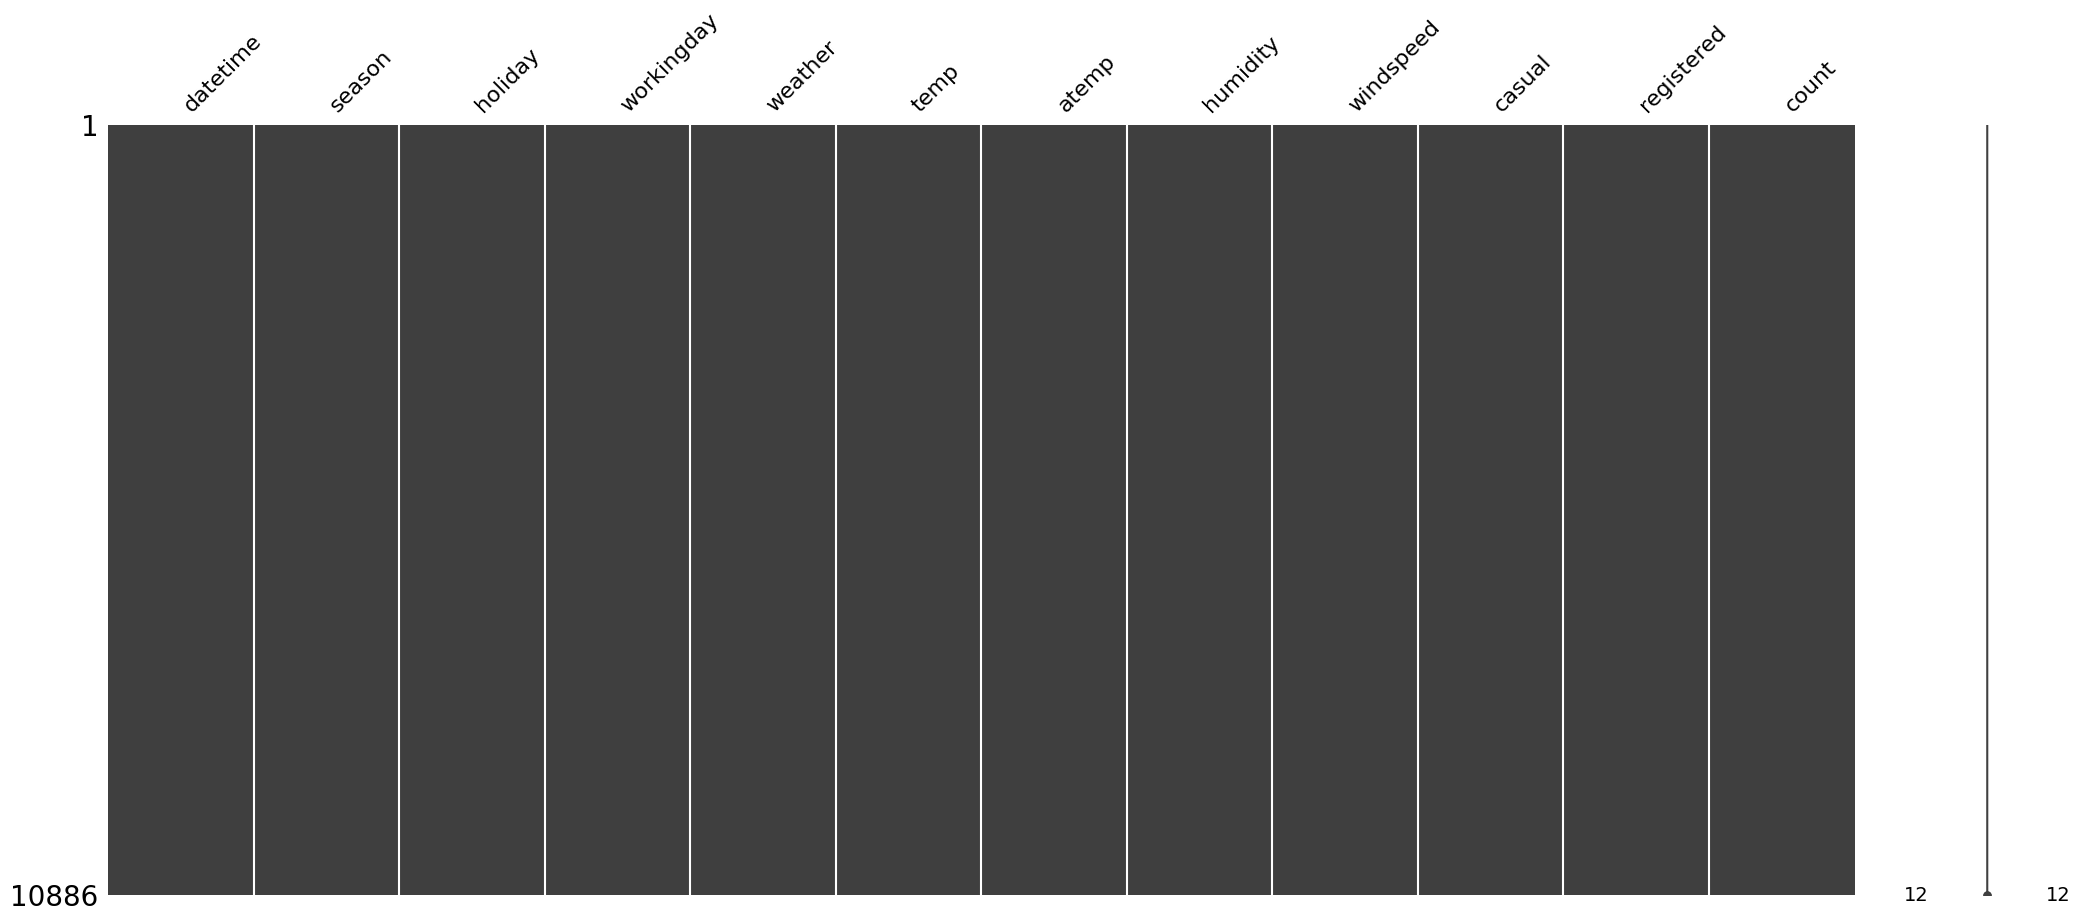

In [3]:
# Method 1
df.isnull().sum()

# Method 2
import missingno as msno
msno.matrix(df)

# Luckily there are not any missing data in this data set.

### __**Categorical data**__


> &emsp; &ensp; Split the datetime column into ['month', 'day', 'hour'] categories since the bike demand is more likely dependent on these individual categories

In [5]:
# convert the datetime column to a pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# extract the month, day, and hour columns
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour

# drop the original datetime column
# df.drop('datetime', axis=1, inplace=True)

# view the modified DataFrame
print(df.head())

# Creat a category_list 
category_list = ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'date']
for var in category_list:
    df[var] = df[var].astype('category')

# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day'] = df['day'].map(day_dict)

    

             datetime season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00      1       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00      1       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00      1       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00      1       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  day        date  \
0        81        0.0       3          13     16      1    1  2011-01-01   
1        80        0.0       8          32     40      1    1  2011-01-01   
2        80        0.0       5          27     32      1    1  2011-01-01   
3        75        0.0       3          10     13      1    1  2011-01-01   
4        75        0.0       0           1      1      1    1  2011-01-01   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  


### __**Visualize relationships between data**__

[Text(0.5, 1.0, 'Hourly Count based on Working day or not')]

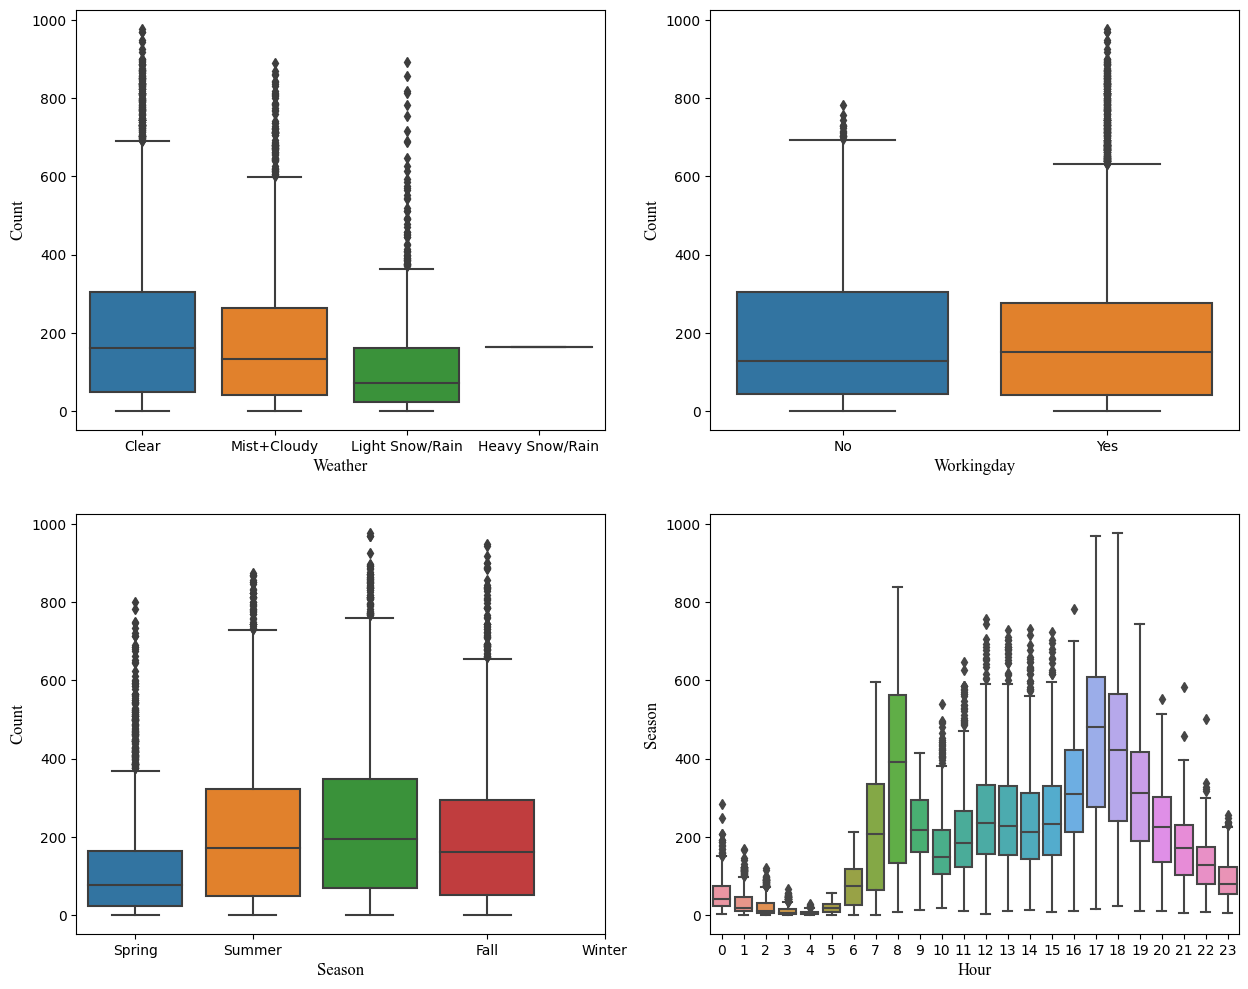

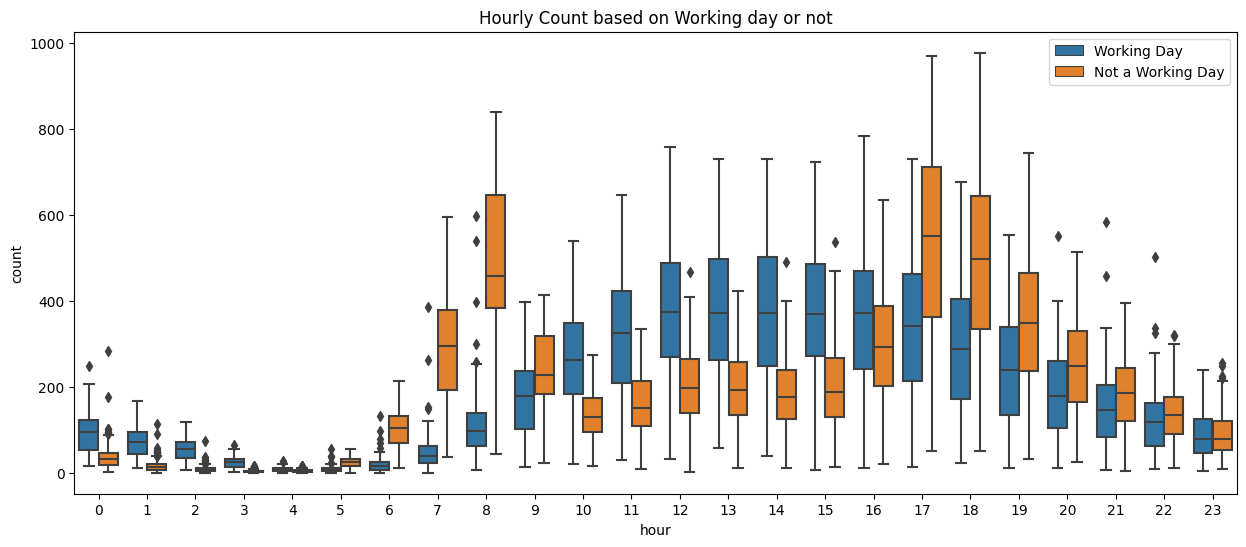

In [6]:
# Figure setting
plt.figure(figsize=(15,12))

plt.subplot(221)
sns.boxplot(data=df, y='count', x='weather')
plt.xlabel('Weather',fontsize=12,**csfont)
plt.ylabel('Count',fontsize=12,**csfont)
plt.xticks(ticks=[0,1,2,3],labels=['Clear', 'Mist+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain'])


plt.subplot(222)
sns.boxplot(data=df, y='count', x='workingday')
plt.xlabel('Workingday',fontsize=12,**csfont)
plt.ylabel('Count',fontsize=12,**csfont)
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])

plt.subplot(223)
sns.boxplot(data=df, y='count', x='season')
plt.xlabel('Season',fontsize=12,**csfont)
plt.ylabel('Count',fontsize=12,**csfont)
plt.xticks(ticks=[0,1,3,4],labels=['Spring', 'Summer', 'Fall', 'Winter'])


plt.subplot(224)
sns.boxplot(data=df, y='count', x='hour')
plt.xlabel('Hour',fontsize=12,**csfont)
plt.ylabel('Season',fontsize=12,**csfont)

# Figure setting
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Working Day', 'Not a Working Day'])
axes.set(title='Hourly Count based on Working day or not')


### __**Observation**__

+ There is a positive correlation between clear and sunny weather and higher bike rentals.
+ Compared to the Summer and Fall seasons, bike rentals tend to be lower in the Spring season.
+ There are numerous outliers in bike rental demand for certain seasons or weather conditions. This may be attributed to variations in rental patterns throughout the day. Typically, the number of rentals peaks around 8am and 5pm (corresponding to office hours), and drops to almost zero during the early hours of the morning.
+ It appears that there are two types of bike rental patterns on a given day, depending on whether it is a working day or not.
    + On a workday, the distribution of bike rentals exhibits two peaks, one at 8am and the other at 5pm. In contrast, on a non-workday, the distribution is more evenly spread across the day, with a peak occurring around noon.

### __**The relationship between distribution vs. weather, season, working day**__

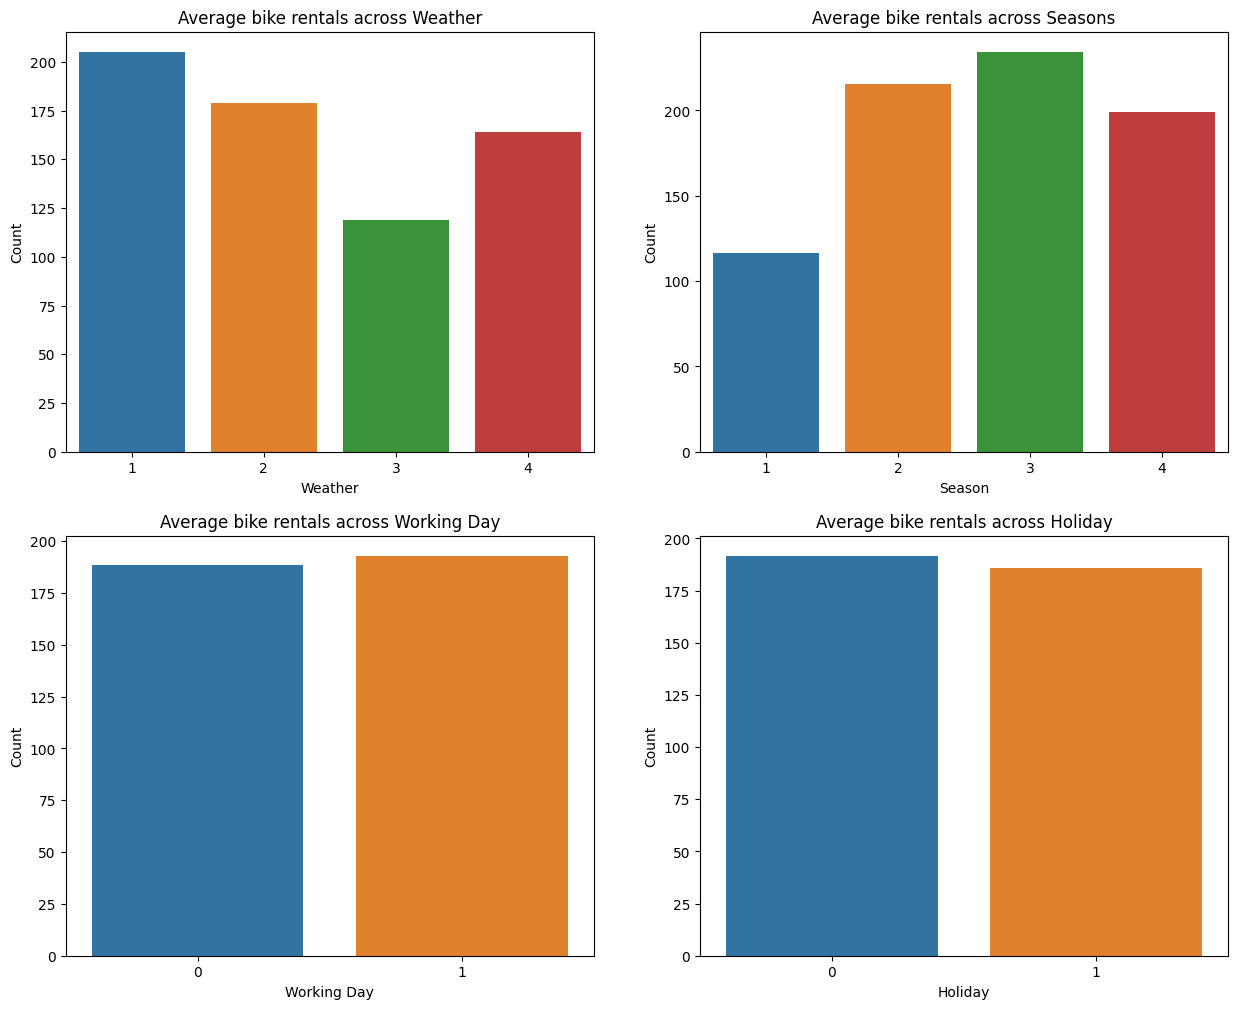

In [7]:
# Average values across each of the categorical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

group_weather = pd.DataFrame(df.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes[0,0])
axes[0,0].set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

group_season = pd.DataFrame(df.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes[0,1])
axes[0,1].set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

group_workingday = pd.DataFrame(df.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes[1,0])
axes[1,0].set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

group_holiday = pd.DataFrame(df.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_holiday, x='holiday', y='count', ax=axes[1,1])
axes[1,1].set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')

plt.show()

### __**The relationship between distribution vs. temperature**__

C:\Users\asus\AppData\Local\Temp\ipykernel_26256\1710167331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_w['temp_round'] = mydata_w['temp'] // bin_size
C:\Users\asus\AppData\Local\Temp\ipykernel_26256\1710167331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_nw['temp_round'] = mydata_nw['temp'] // bin_size


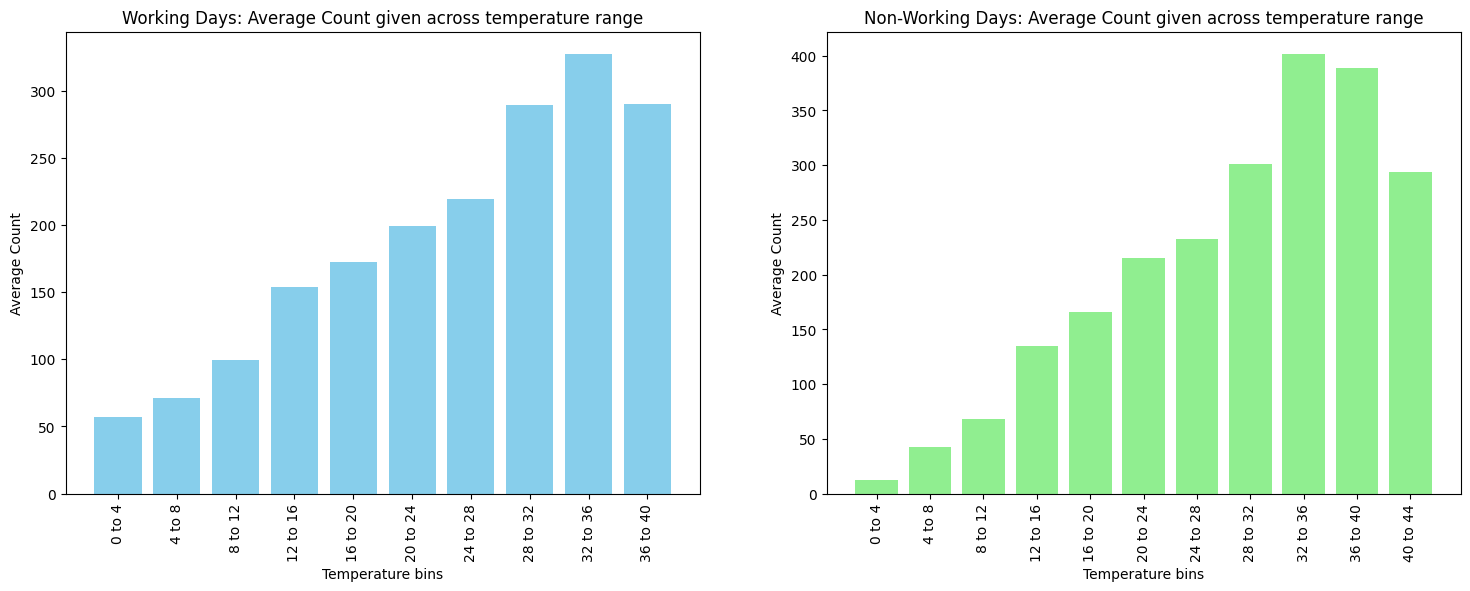

In [9]:
import seaborn as sns

# Splitting data into working-day and non-working day
mydata_w = df[df.workingday==1]
mydata_nw = df[df.workingday==0]

bin_size = 4
mydata_w['temp_round'] = mydata_w['temp'] // bin_size
mydata_nw['temp_round'] = mydata_nw['temp'] // bin_size

mean_count_vs_temp_w = mydata_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = mydata_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size * i) + ' to ' + str(bin_size * (i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size * i) + ' to ' + str(bin_size * (i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(x=idx_w, height=mean_count_vs_temp_w, color='skyblue')
axes[0].set_xticks(idx_w)
axes[0].set_xticklabels(labels_w, rotation=90)
axes[0].set_xlabel('Temperature bins')
axes[0].set_ylabel('Average Count')
axes[0].set_title('Working Days: Average Count given across temperature range')

axes[1].bar(x=idx_nw, height=mean_count_vs_temp_nw, color='lightgreen')
axes[1].set_xticks(idx_nw)
axes[1].set_xticklabels(labels_nw, rotation=90)
axes[1].set_xlabel('Temperature bins')
axes[1].set_ylabel('Average Count')
axes[1].set_title('Non-Working Days: Average Count given across temperature range')

plt.show()


### __**Observation**__

> &emsp; &ensp;By analyzing the histogram plot, it is evident that there is a consistent rise in the average number of bikes rented with increasing temperature. However, there seems to be a slight decrease in the highest temperature bin.

### __**The relationship between distribution and hour**__

C:\Users\asus\AppData\Local\Temp\ipykernel_26256\2007207462.py:13: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melt = pd.melt(frame=df, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')


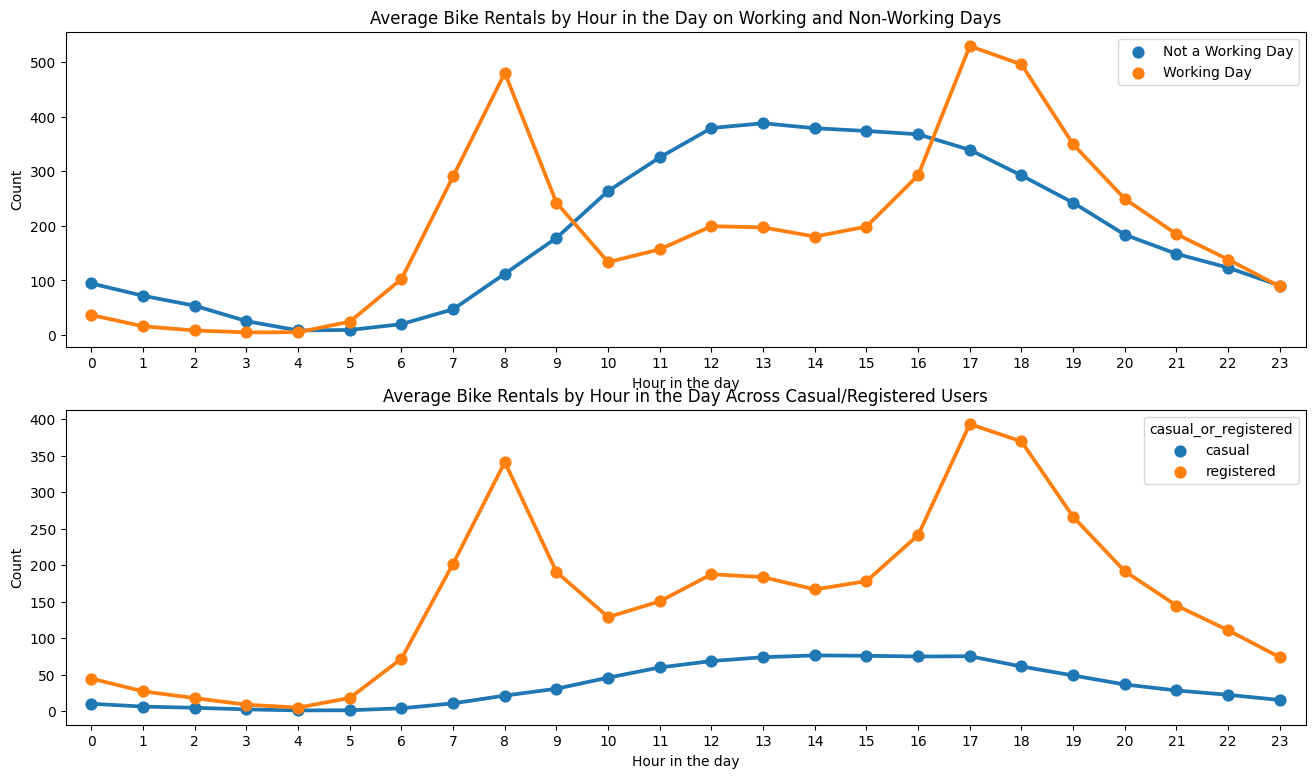

In [10]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 9))

# Working day vs Non-working day average bike rentals across hour in the day
group_work_hour = pd.DataFrame(df.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by Hour in the Day on Working and Non-Working Days')

# Average bike rentals by user type and hour in the day
df_melt = pd.melt(frame=df, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[1])
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by Hour in the Day Across Casual/Registered Users')

plt.show()


### __**The relationship between distribution and month**__

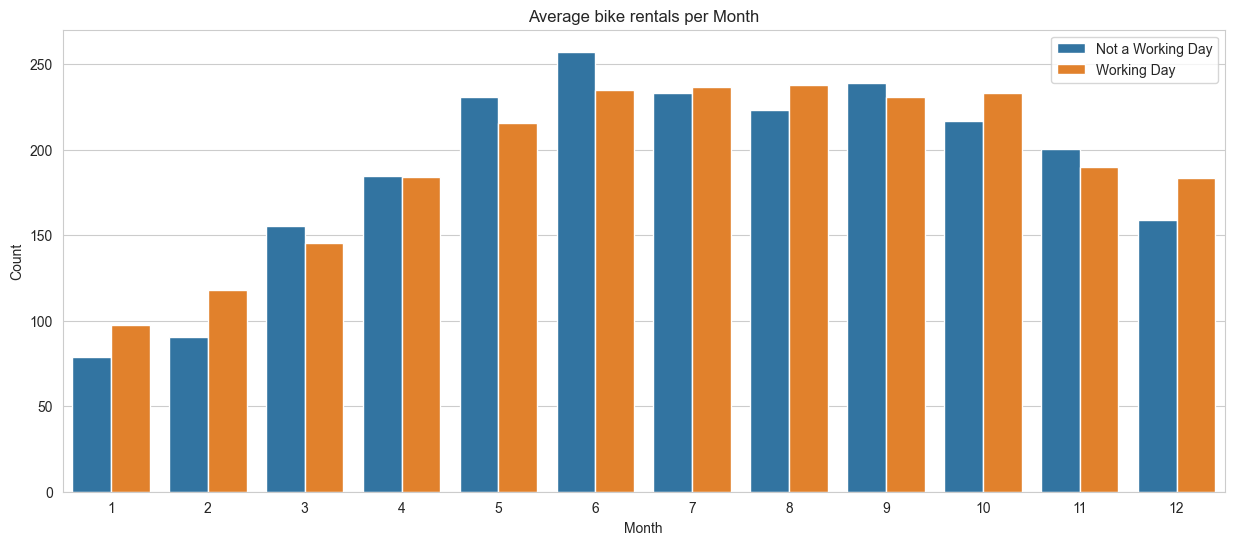

In [11]:
# Average Monthly Count Distribution plot
import seaborn as sns

# set plot style
sns.set_style("whitegrid")

# create subplot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# group data by month and working day and calculate average count
group_month = pd.DataFrame(df.groupby(['month', 'workingday'])['count'].mean()).reset_index()

# plot bar chart
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)

# set plot labels and title
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')

# set legend
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])

# show plot
plt.show()



### __**Observation**__

>&emsp; &ensp;The seaborn box plot shows fewer outliers across hours, suggesting that most outliers are due to a highly variable distribution throughout the day. Bike reservations are highest around 8am and 5pm, during office hours, and close to zero in the early morning hours.
<br>
&emsp; &ensp;The plot reveals two distinct patterns in bike rentals across the hours of the day, depending on the type of day:
<br>
>+ &emsp; &ensp;Working Day: There are two peaks in rentals at around 8am and 5pm, corresponding to local bikers who are typically registered and commute to work on weekdays (Monday to Friday).
<br>
>+ &emsp; &ensp;Non-Working Day: Rentals are more or less uniform throughout the day, with a peak around noon. This pattern likely corresponds to tourists who are typically casual users, renting and dropping off bikes uniformly throughout the day and touring Washington, D.C., on non-working days (Saturday and Sunday).
<br>
>&emsp; &ensp;Furthermore, the plot shows that bike rentals are higher during the fall (July to September) and summer (April to June) seasons.

## Training the model

In [12]:
y = df['count']
# y = df['registered']
# y= df['casual']
X = df.drop(['count','registered',"casual","day","datetime","date"],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

y_train.head

print(X_train.isna().sum())
print(y_train.isna().sum())

X.head()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
month         0
hour          0
dtype: int64
0


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,1
2,1,0,0,1,9.02,13.635,80,0.0,1,2
3,1,0,0,1,9.84,14.395,75,0.0,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,4


### __**Linear Regression**__

>&emsp; &ensp;Based on the insights gained from the data analysis, there are two main reasons why linear regression would be a suitable choice for predicting bike rentals in this case.
<br>
>&emsp; &ensp;Firstly, the data exhibits a strong linear relationship between the predictors and the target variable. For example, as temperature and humidity increase, bike rentals tend to increase as well. This linear relationship can be easily captured by a linear regression model, which estimates the relationship between the predictors and the target variable using a linear equation. Moreover, the scatter plots and correlation matrix suggest that there are no strong nonlinear or interaction effects between the predictors, further supporting the use of a linear model.
<br>
>&emsp; &ensp;Secondly, linear regression is a simple and interpretable model, which can be beneficial in this case for understanding the factors that contribute to bike rentals. By examining the coefficients of the linear regression model, we can easily identify which predictors have a significant impact on bike rentals and in what direction. This can provide valuable insights for bike rental companies and city planners, who can then use this information to optimize their services and infrastructure accordingly.
<br>
>&emsp; &ensp;Overall, the strong linear relationship between the predictors and the target variable, as well as the interpretability of the model, make linear regression a suitable choice for predicting bike rentals in this case.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# Use Linear Regression model for machine learning
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)
# Save model
import joblib
joblib.dump(model,'BikeLR.pkl',compress=3)



MSE: 21239.47051979814
RMSE: 145.73767707699386
R-squared: 0.3448190718628771


['BikeLR.pkl']

### __**Random Forest**__

>&emsp; &ensp;Random Forest is a popular and effective machine learning algorithm that has been widely applied across various domains including finance, marketing, and healthcare. In the context of the bike rental prediction competition, Random Forest can be a beneficial choice for several reasons.
<br>
>&emsp; &ensp;One of the key advantages of Random Forest is its ability to handle non-linear relationships between features and target variables. In the bike rental dataset, predicting the bike rental count requires consideration of multiple factors such as weather, season, and time of day, which can interact in complex ways. Linear models may fail to capture such non-linear relationships accurately. Random Forest can model such relationships by creating multiple decision trees and combining their predictions. This leads to more accurate and reliable predictions.
<br>
>&emsp; &ensp;Another significant advantage of Random Forest is its robustness to overfitting. With a high-dimensional dataset like bike rentals, it is common for linear models to overfit and include irrelevant features. In contrast, Random Forest builds multiple trees on subsets of the data and features, which reduces the risk of overfitting and leads to better generalization.
<br>
>&emsp; &ensp;In summary, Random Forest is a versatile algorithm that can handle complex, non-linear relationships between features and target variables while preventing overfitting. This makes it a suitable choice for the bike rental prediction competition, where the goal is to predict bike rentals accurately while avoiding overfitting.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest model for machine learning
rf = RandomForestRegressor(n_estimators=100, random_state=54)

# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions using the test data
y_pred = rf.predict(X_test)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print('RMSLE:', rmsle)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)
# Save model
import joblib
joblib.dump(model,'BikeRF.pkl',compress=3)

RMSLE: 0.44609287900552347
MSE: 4606.6989030734185
RMSE: 67.87266683336834


['BikeRF.pkl']

## __**Model export**__

### __**Linear Regression**__

In [30]:
import joblib
joblib.dump(model,'BikeLR.pkl',compress=3)
model_pretrained=joblib.load('BikeLR.pkl')

df_test=pd.read_csv("test.csv")

# convert the datetime column to a pandas datetime format
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# extract the month, day, and hour columns
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['date'] = df_test['datetime'].dt.date
df_test['hour'] = df_test['datetime'].dt.hour


# Creat a category_list 
category_list = ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'date']
for var in category_list:
    df_test[var] = df_test[var].astype('category')

# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_test['day'] = df_test['day'].map(day_dict)

df_test.drop("day",axis=1,inplace=True)
df_test.drop('datetime',axis=1,inplace=True)
df_test.drop("date",axis=1,inplace=True)
print(df_test.head())

predictions2 = model_pretrained.predict(df_test)

dfs=pd.read_csv("test.csv")

#Preare submit file
forSubmissionDF=pd.DataFrame(columns=['datetime','count'])
forSubmissionDF['datetime']=dfs["datetime"].values
forSubmissionDF['count']=abs(predictions2)
forSubmissionDF

forSubmissionDF.to_csv('LR.csv', index=False)


  season holiday workingday weather   temp   atemp  humidity  windspeed month  \
0      1       0          1       1  10.66  11.365        56    26.0027     1   
1      1       0          1       1  10.66  13.635        56     0.0000     1   
2      1       0          1       1  10.66  13.635        56     0.0000     1   
3      1       0          1       1  10.66  12.880        56    11.0014     1   
4      1       0          1       1  10.66  12.880        56    11.0014     1   

  hour  
0    0  
1    1  
2    2  
3    3  
4    4  


>&emsp; &ensp;The R-squared value is an important metric used to evaluate the goodness of fit of a regression model. It indicates the proportion of variance in the dependent variable that can be explained by the independent variables in the model. A high R-squared value indicates that the model is a good fit for the data, while a low R-squared value suggests that the model does not explain much of the variance in the data. In this case, the R-squared value obtained for the linear regression model is quite low, which suggests that the model is not a good fit for the data.
<br>
>&emsp; &ensp;There are several reasons why the linear regression model may not be suitable for this dataset. First, there are many nonlinear relationships between the dependent variable and the independent variables. For example, the relationship between temperature and bike rentals is not linear, as the number of rentals tends to increase with temperature up to a certain point, after which it starts to decrease. Linear regression assumes a linear relationship between the dependent and independent variables, and hence may not be able to capture these nonlinear relationships.
<br>
>&emsp; &ensp;Second, there are many categorical variables in the dataset, such as season, working day, and weather conditions. Linear regression is not well-suited for modeling categorical variables, as it assumes a continuous dependent variable. While it is possible to use techniques such as one-hot encoding to convert categorical variables into numerical ones, this can result in a large number of features and may lead to overfitting.
<br>
>&emsp; &ensp;Finally, the dataset contains many outliers, which can have a significant impact on the performance of linear regression. Linear regression is sensitive to outliers, and even a few outliers can result in a poor fit. This is evident from the large number of outliers observed in the box plot, which suggests that a more robust regression technique may be needed.
<br>
>&emsp; &ensp;In conclusion, while linear regression is a simple and widely used regression technique, it may not be suitable for all datasets. In this case, the low R-squared value suggests that the linear regression model is not a good fit for the data, and a more sophisticated technology may be needed to accurately model the relationship between the independent and dependent variables.
<br>
>&emsp; &ensp;The linear regression model is applied to predict the number of bicycle rentals. After logarithmic transformation and feature engineering, the RMSLE value of the model was 1.2. However, there is still room for further improvement in this RMSLE value. I think following three aspects to improve the RMSLE
> 1. Try different combinations of special investigations.
> 2. Use other machine learning models, such as random forest and gradient boosting trees, and perform model integration. (This time, I'll take this one.)
> 3. Adjust model hyperparameters, such as adjusting regularization parameters and learning rates.

![](https://i.imgur.com/yonb0fZ.png)
![](https://i.imgur.com/yFt9m7h.png)

### __**Random Forest**__

In [28]:
import joblib
joblib.dump(rf,'BikeRF.pkl',compress=3)
model_pretrained=joblib.load('BikeRF.pkl')

df_test=pd.read_csv("test.csv")

# convert the datetime column to a pandas datetime format
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# extract the month, day, and hour columns
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['date'] = df_test['datetime'].dt.date
df_test['hour'] = df_test['datetime'].dt.hour

# drop the original datetime column
# df.drop('datetime', axis=1, inplace=True)

# view the modified DataFrame


# Creat a category_list 
category_list = ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'date']
for var in category_list:
    df_test[var] = df_test[var].astype('category')

# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_test['day'] = df_test['day'].map(day_dict)

df_test.drop("day",axis=1,inplace=True)
df_test.drop('datetime',axis=1,inplace=True)
df_test.drop("date",axis=1,inplace=True)
print(df_test.head())

predictions2 = model_pretrained.predict(df_test)

dfs=pd.read_csv("test.csv")

#Preare submit file
forSubmissionDF=pd.DataFrame(columns=['datetime','count'])
forSubmissionDF['datetime']=dfs["datetime"].values
forSubmissionDF['count']=predictions2
forSubmissionDF

forSubmissionDF.to_csv('RF.csv', index=False)


  season holiday workingday weather   temp   atemp  humidity  windspeed month  \
0      1       0          1       1  10.66  11.365        56    26.0027     1   
1      1       0          1       1  10.66  13.635        56     0.0000     1   
2      1       0          1       1  10.66  13.635        56     0.0000     1   
3      1       0          1       1  10.66  12.880        56    11.0014     1   
4      1       0          1       1  10.66  12.880        56    11.0014     1   

  hour  
0    0  
1    1  
2    2  
3    3  
4    4  


> &emsp; &ensp;The Random Forest model is a powerful machine learning algorithm that can accurately predict bike rental counts in the competition. The RMSLE value of 0.5 is a significant improvement compared to previous attempts using linear regression, indicating that Random Forest can capture complex non-linear relationships between the target variable and the features in the dataset.
<br>
> &emsp; &ensp;The Random Forest model works by constructing multiple decision trees on subsets of the data and features, and combining their predictions to produce a final output. This allows for greater flexibility in modeling non-linear relationships and interactions between the features, compared to linear regression models. Additionally, Random Forest is robust to overfitting, which is a common problem in high-dimensional datasets.
<br>
> &emsp; &ensp;In the bike rental dataset, the Random Forest model can handle the complex relationships between the target variable "count" and multiple factors such as season, weather, and time of day. By processing information from these factors, the model can accurately predict the bike rental count. Furthermore, the Random Forest model can automatically select the most relevant features for prediction, reducing the risk of overfitting and leading to better generalization.
<br>
> &emsp; &ensp;Overall, the Random Forest model is an effective tool for predicting bike rental counts in the competition, and can provide more accurate results than linear regression models. The model's ability to handle non-linear relationships and prevent overfitting makes it a valuable asset for machine learning practitioners in various domains.

![](https://i.imgur.com/ERfDSAB.png)
![](https://i.imgur.com/WRCyAEB.png)

## __**Conclusion**__

> &emsp; &ensp;Due to the submission deadline of the competition, I couldn't submit my results for ranking. According to my results, the corresponding rankings for linear regression and random forest models are 2923 and 1874, respectively.

>  &emsp; &ensp;Participating in the bike rental prediction competition was an exciting experience that pushed me to explore various machine-learning models and techniques to enhance my skills. Throughout the competition, I learned how to analyze and extract relevant features to develop accurate models. At the beginning of the competition, I spent time familiarizing myself with the dataset and its variables. I analyzed the correlation between variables and how they impacted the bike rental count. With this information, I began testing different machine-learning models.
<br>
>  &emsp; &ensp;Initially, I tried a linear regression model, but its performance was not satisfactory. So, I started to experiment with a random forest model. After testing different combinations of hyperparameters and features, I managed to develop an accurate model capable of achieving an RMSLE of 0.5. Throughout the competition, I realized the importance of feature engineering. The model's accuracy relies heavily on the quality of the features selected. Therefore, I spent a significant amount of time testing different combinations of features, trying to extract the most relevant ones.
<br>
>  &emsp; &ensp;The competition was challenging, but it also taught me how to handle data analysis problems. I learned how to select the right model, understand the dataset, and how to develop accurate models. In addition, I discovered the importance of data visualization, which allowed me to comprehend the data better and make better decisions during the modeling process. One of the most significant takeaways from the competition was the value of experimenting with different models. By testing different models, I could identify the strengths and weaknesses of each and select the most suitable one for the task at hand. I also learned that improving the accuracy of a model is a process of trial and error that requires patience, attention to detail, and critical thinking.
<br>
>  &emsp; &ensp;In conclusion, participating in the bike rental prediction competition has been an invaluable experience for me. I learned about different machine learning models, feature engineering, and data visualization techniques. I also gained practical experience in data analysis, which improved my programming and data analysis skills. I look forward to participating in more competitions to continue improving my skills and knowledge in the field of machine learning.